# ***Importing all Required***

In [38]:
from sympy import cos, sin, pprint,pi
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import math

# ***Program to plot path and display joint angles and torques***

⎡12.3088676082486  -7.69113239175136  -27.6911323917514  -37.6911323917514  -3
⎢                                                                             
⎢       0                  0                  0                  0            
⎢                                                                             
⎢-108.80193658995  -74.1609204385725  -108.80193658995   -91.4814285142613  -9
⎢                                                                             
⎢       0                  0                  0                  0            
⎢                                                                             
⎢       1                  1                  1                  1            
⎢                                                                             
⎣       0                  0                  0                  0            

7.6911323917514   11.16971069393     11.16971069393     69.0801794773963     6
                                                   

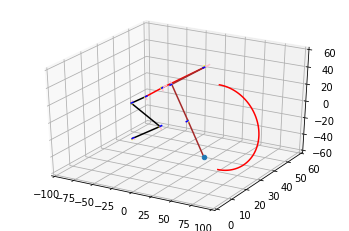


 Matrix([[108.801936589950], [-11.5956934877975], [12.3088676082486]])

 Matrix([[108.801936589950], [-11.5956934877975], [12.3088676082486]])

 Matrix([[108.801936589950], [-11.5956934877975], [12.3088676082486]])

 Matrix([[108.801936589950], [-11.5956934877975], [12.3088676082486]])

 Matrix([[108.801936589950], [-11.5956934877975], [12.3088676082486]])

 Matrix([[108.801936589950], [-11.5956934877975], [12.3088676082486]])

 Matrix([[108.801936589950], [-11.5956934877975], [12.3088676082486]])

 Matrix([[108.801936589950], [-11.5956934877975], [12.3088676082486]])

 Matrix([[108.801936589950], [-11.5956934877975], [12.3088676082486]])

 Matrix([[108.801936589950], [-11.5956934877975], [12.3088676082486]])

 Matrix([[108.801936589950], [-11.5956934877975], [12.3088676082486]])

 Matrix([[108.801936589950], [-11.5956934877975], [12.3088676082486]])

 Matrix([[108.801936589950], [-11.5956934877975], [12.3088676082486]])

 Matrix([[108.801936589950], [-11.5956934877975], [12.308867608

In [45]:
if __name__ == '__main__':
    
    
    # Joint-angles in radians
    q = [-np.pi/3,2*np.pi/3,-2*np.pi/3,0.01,0.01,0.01,0.01,-np.pi/2,0.01,0.01]   

    # calculating transformation matrices
    
    tm0n = transformation_matrices(q,10,60,20,-40,-40,-20,40,40)

    # calculating the jacobian matrix
    
    j = calculating_jacobian(tm0n)
    pprint(j)

    # plotting the arm
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlim3d(-100,100)
    ax.set_ylim3d(0,60)
    ax.set_zlim3d(-60,60)
    plot_arm(tm0n)

# Printing semi_circle

    x, y, z = semi_circle(50,30,-10,50,100)
    ax.plot3D(x, y, z, 'red')

    time = 5 / len(x)         # Total time by number of points to cover

 # For the end effector to follow the semi_circle
    g_q = calculate_g_q(tm0n)   
    F = sp.Matrix([[0], [-445], [0], [0], [0], [0]])
    # Calculating g(q) matrix
    tor = []
    # tor.append(g_q - (j[-1].T * F))    

    for k in range(0, len(x)):
        end_eff = tm0n[-1].extract([0, 1, 2], [-1])                             
        path_to_follow = sp.Matrix([[x[k]], [y[k]], [z[k]]])    

         # rate of change of position and angles

        rate_pos = (path_to_follow - end_eff) / time                             
        rate_angle = j.pinv() * rate_pos.col_join(sp.Matrix([[0], [0], [0]])) 

        for l in range(0, 10): 
             q[l] = ((q[l] + (rate_angle[l] * time)) % (2 * 3.14)) 



        print('\n',end_eff)
        ax.scatter3D(float(end_eff[0]), float(end_eff[1]), float(end_eff[2]))
        plt.pause(0.1)
    plt.show()

# ***Creating the transformation matrices***

In [40]:
def transformation_matrices(a,d1,d2,d3,r1,r2,r3,r4,r5):
    t = [sp.Matrix([[cos(a[0]),-sin(a[0]), 0, r1*cos(a[0])], [sin(a[0]), cos(a[0]), 0,r1*sin(a[0])], [0, 0, 1, 0], [0, 0, 0, 1]]),
          sp.Matrix([[cos(a[1]),-sin(a[1]), 0, r2*cos(a[1])], [sin(a[1]), cos(a[1]), 0,r2*sin(a[1])], [0, 0, 1, 0], [0, 0, 0, 1]]),
          sp.Matrix([[cos(a[2]),-sin(a[2]), 0, r3*cos(a[2])], [sin(a[2]), cos(a[2]), 0,r3*sin(a[2])], [0, 0, 1, 0], [0, 0, 0, 1]]),
          sp.Matrix([[cos(a[3]),-sin(a[3]), 0, 0], [sin(a[3]), cos(a[3]), 0,0], [0, 0, 1, d1], [0, 0, 0, 1]]),
          sp.Matrix([[cos(a[4]-np.pi/2),0,sin(a[4]-np.pi/2),  0], [sin(a[4]-np.pi/2), 0,-cos(a[4]-np.pi/2), 0], [0, 1, 0,0], [0, 0, 0, 1]]),
          sp.Matrix([[cos(a[5]),-sin(a[5]), 0,0], [sin(a[5]), cos(a[5]), 0,0], [0, 0, 1, d2], [0, 0, 0, 1]]),
          sp.Matrix([[cos(a[6]),0,sin(a[6]),  0], [sin(a[6]), 0,-cos(a[6]), 0], [0, 1, 0,0], [0, 0, 0, 1]]),
          sp.Matrix([[cos(a[7]),-sin(a[7]), 0,0], [sin(a[7]), cos(a[7]), 0,0], [0, 0, 1, d3], [0, 0, 0, 1]]),
          sp.Matrix([[cos(a[8]-np.pi/2),-sin(a[8]-np.pi/2), 0, r4*cos(a[8]-np.pi/2)], [sin(a[8]-np.pi/2), cos(a[8]-np.pi/2), 0,r4*sin(a[8]-np.pi/2)], [0, 0, 1, 0], [0, 0, 0, 1]]),
          sp.Matrix([[cos(a[9]),-sin(a[9]), 0, r5*cos(a[9])], [sin(a[9]), cos(a[9]), 0,r5*sin(a[9])], [0, 0, 1, 0], [0, 0, 0, 1]])]

  #consider identity matrix to initialize
    tran = [sp.Matrix([[0,1, 0, 0], [0, 0,1, 0], [-1,0,0, 0], [0, 0, 0, 1]])]


  #Here we are calculating the final transformation matrix

    for i in range(0, len(t)):
        tran.append(tran[i] * t[i])
     
    return tran

# ***Creating a function to calculate Jacobians***

In [41]:
def calculating_jacobian(tran):
    j_temp = []
    o_9 = tran[-1].extract([0, 1, 2], [3])              # Extracting Fourth column from final transformation matrix
   
    for i in range(0, len(tran) - 1):
        z_i = tran[i].extract([0, 1, 2], [2])          # Extracting zi from Ti matrix
        o_i = tran[i].extract([0, 1, 2], [3])           # Extracting oi from Ti matrix
        row_1 = z_i.cross(o_9 - o_i)                      
        j0n = row_1.col_join(z_i)                         
        j_temp.append(j0n)
    j_1 = j_temp[0]                                       
    for k in range(1, len(j_temp)):
        j_1 = j_1.row_join(j_temp[k])
    return j_1

# ***Creating a function to plot a path for the arm***

In [42]:
def semi_circle(x_off, y_off, z_off, r, s):
    th1 = np.linspace(3.14, 0, s)              # Equally spaced angles of a semi_circle
    x_val = []
    z_val = []
    for i in th1:
        x_val.append(r * sin(i) + x_off)           # Vector of X Cordinates
        z_val.append(r * cos(i) + z_off)           # Vector of Z Cordinates
    y_val = np.ones(s) * y_off
    return x_val, y_val, z_val

# ***Calclating Gravity Matrix***

In [43]:
def calculate_g_q(tm0n_temp):
    g = 980 #in cm/s^-2                                                                             
    g_q_temp = sp.Matrix([[0], [0], [0]])                           # Initialising g(q) matrix

    # Height of centre of masses of each link
    z1 = tm0n_temp[7][2, 3]
    z2 = tm0n_temp[8][2, 3]
    z3 = tm0n_temp[10][2, 3]
    h_i = [(z1)/2, (z2 - z1)/2, (z3 - z2)/2]
    m_i = [6.24,7.93,7.93]
    # Computing g(q) matrix
    for i in range(0, len(h_i)):
        g_q_temp[i] = m_i[i] * g * h_i[i]
    print(g_q_temp)
    return g_q_temp

# ***Plotting paths***

In [44]:
def plot_path_one(f1, f2):
    ax.plot3D([f1[0, 3], f2[0, 3]],[f1[1, 3], f2[1, 3]],[f1[2, 3], f2[2, 3]],'black') #highlights robot leg
def plot_path_two(f1, f2):
    ax.plot3D([f1[0, 3], f2[0, 3]],[f1[1, 3], f2[1, 3]],[f1[2, 3], f2[2, 3]],'red') #highlights upper body
def plot_path_three(f1, f2):
    ax.plot3D([f1[0, 3], f2[0, 3]],[f1[1, 3], f2[1, 3]],[f1[2, 3], f2[2, 3]],'brown') #highlights robot arm


def plot_frame(f):
    rx = f[:, 0]      
    ry = f[:, 1]      
    rz = f[:, 2]       
    tx = f[0, 3]       
    ty = f[1, 3]       
    tz = f[2, 3]       
    ax.plot3D([tx, 1 * rx[0, 0] + tx], [ty, 1 * rx[1, 0] + ty], [tz, 1 * rx[2, 0] + tz], 'yellow')
    ax.plot3D([tx, 3 * ry[0, 0] + tx], [ty, 3 * ry[1, 0] + ty], [tz, 3 * ry[2, 0] + tz], 'pink')
    ax.plot3D([tx, 1 * rz[0, 0] + tx], [ty, 1 * rz[1, 0] + ty], [tz, 1 * rz[2, 0] + tz], 'blue')

def plot_arm(tran):
    
    plot_path_one(tran[0], tran[1])
    plot_path_one(tran[1], tran[2])
    plot_path_one(tran[2], tran[3])
    plot_path_two(tran[3], tran[4])
    plot_path_two(tran[4], tran[5])
    plot_path_two(tran[5], tran[6])
    plot_path_three(tran[6], tran[7])
    plot_path_three(tran[7], tran[8])
    plot_path_three(tran[8], tran[9])
    plot_path_three(tran[9], tran[10])
  
    

    plot_frame(tran[0])
    plot_frame(tran[1])
    plot_frame(tran[2])
    plot_frame(tran[3])
    plot_frame(tran[4])
    plot_frame(tran[5])
    plot_frame(tran[6])
    plot_frame(tran[7])
    plot_frame(tran[8])
    plot_frame(tran[9])
   
   